In [82]:
import sys
sys.path.append("C:\\Users\\Shyam\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages")
sys.path.append(r'D:\shyam\graphviz-2.38\release\bin')
import os
os.environ["PATH"] += os.pathsep + r'D:\shyam\graphviz-2.38\release\bin'

In [83]:
import pandas as pd
import numpy as np

In [84]:
absenteeism = pd.read_csv("Absenteeism_at_work.csv",sep=";")

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.manifold import MDS

In [38]:
embedding = MDS(n_components=2)
absenteeism_transformed = embedding.fit_transform(absenteeism)

In [39]:
absenteeism_transformed.shape

(740, 2)

In [40]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot

In [86]:
embedding = MDS(n_components=3)
absenteeism_3 = embedding.fit_transform(absenteeism)

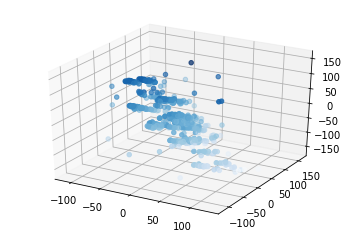

In [91]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(absenteeism_3[:,0], absenteeism_3[:,1], absenteeism_3[:,2], c=absenteeism_3[:,2], cmap='Blues');

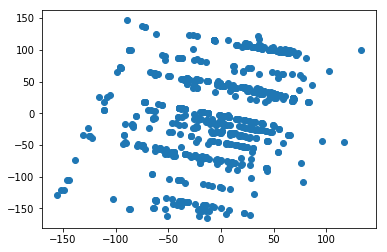

In [41]:
pyplot.scatter(absenteeism_transformed[:,0],absenteeism_transformed[:,1])
pyplot.show()

Estimated number of clusters: 3
Homogeneity: 0.022
Completeness: 0.019
V-measure: 0.020
Adjusted Rand Index: 0.015
Adjusted Mutual Information: 0.015
Silhouette Coefficient: 0.316


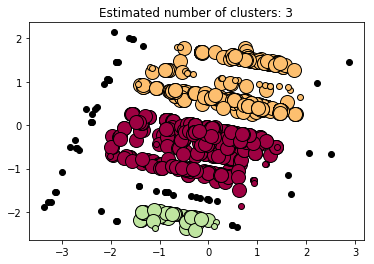

In [81]:
X = StandardScaler().fit_transform(absenteeism_transformed)
#X = absenteeism_transformed
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Text(0.5,1,'K-means transformed plot')

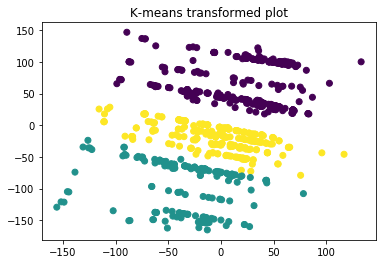

In [57]:
random_state = 6
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(absenteeism_transformed)
plt.scatter(absenteeism_transformed[:, 0], absenteeism_transformed[:, 1], c=y_pred)
plt.title("K-means transformed plot")

Text(0.5,1,'K-means original transformed plot')

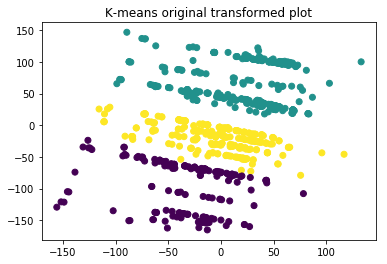

In [58]:
random_state = 6
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(absenteeism)
plt.scatter(absenteeism_transformed[:, 0], absenteeism_transformed[:, 1], c=y_pred)
plt.title("K-means original transformed plot")

For n_clusters = 2 The average silhouette_score is : 0.3709422778606902
For n_clusters = 3 The average silhouette_score is : 0.293664965854951
For n_clusters = 4 The average silhouette_score is : 0.34634337920711683
For n_clusters = 5 The average silhouette_score is : 0.33542574967108235
For n_clusters = 6 The average silhouette_score is : 0.3521102247203298
For n_clusters = 7 The average silhouette_score is : 0.3314919329738351
For n_clusters = 8 The average silhouette_score is : 0.3320995277977021
For n_clusters = 9 The average silhouette_score is : 0.32893002567983426


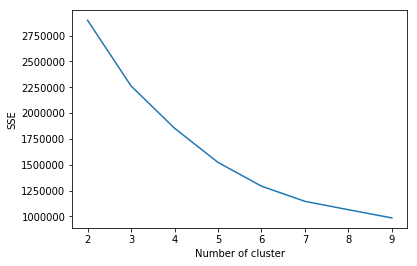

Text(0.5,1,'K-means transformed plot')

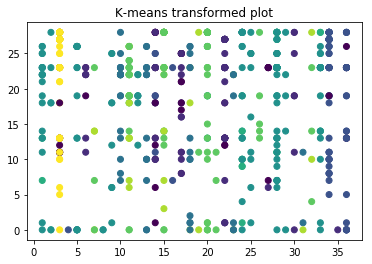

In [60]:
random_state = 5
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='random')
    y_pred = kmeans.fit_predict(absenteeism.values)
    sse[k] = kmeans.inertia_
    silhouette_avg = silhouette_score(absenteeism.values, y_pred)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.scatter(absenteeism.values[:, 0], absenteeism.values[:, 1], c=y_pred)
plt.title("K-means transformed plot")

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
For n_clusters = 2 The average silhouette_score is : 0.3709422778606902
For n_clusters = 3 The average silhouette_score is : 0.293664965854951
For n_clusters = 4 The average silhouette_score is : 0.34802698554033645
For n_clusters = 5 The average silhouette_score is : 0.3396639888191448
For n_clusters = 6 The average silhouette_score is : 0.3466324205074593


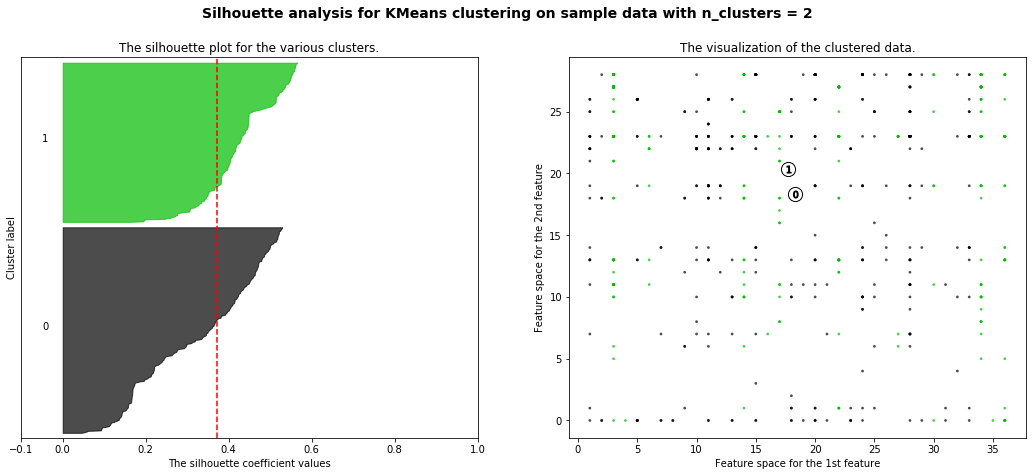

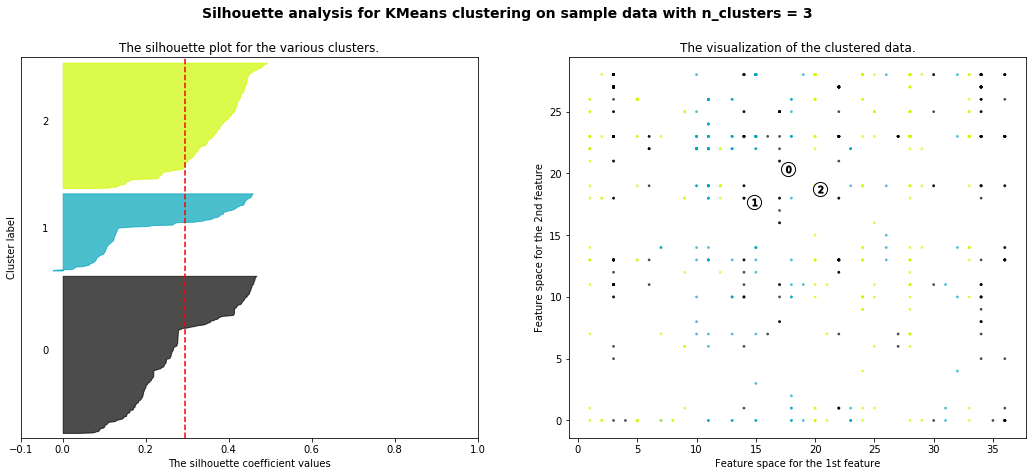

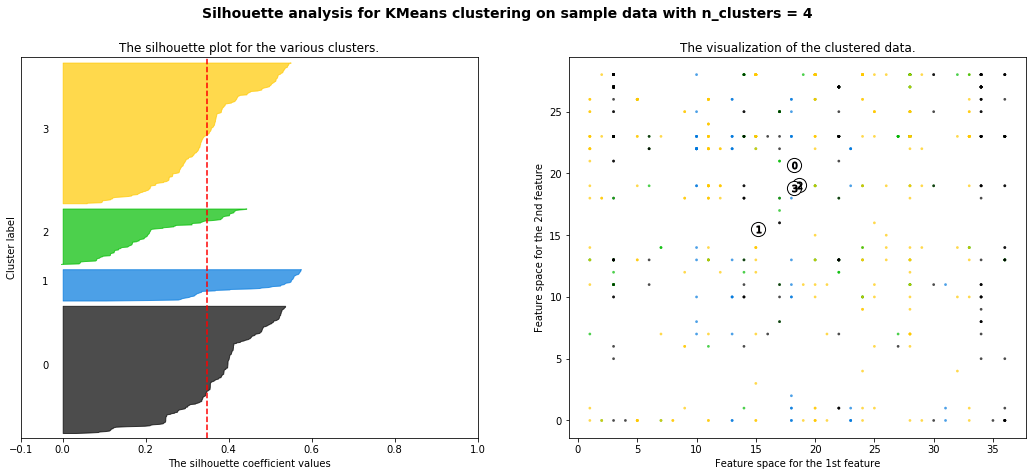

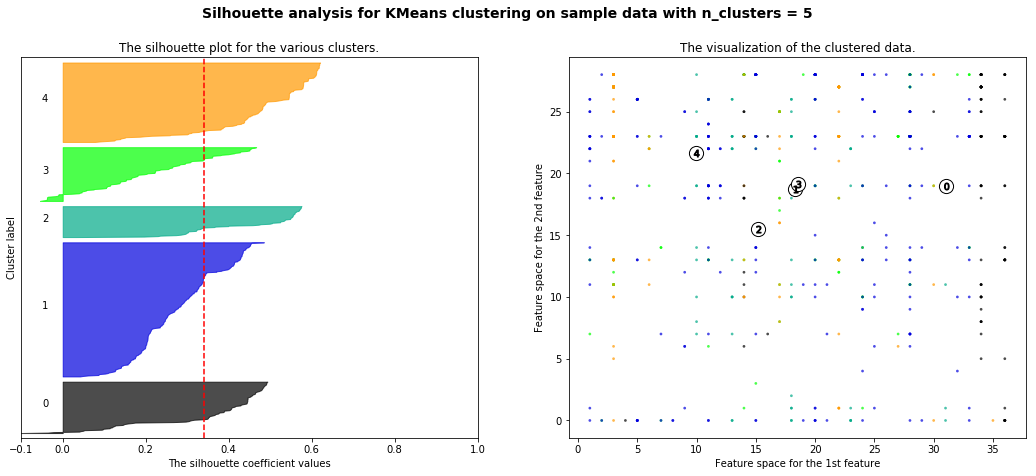

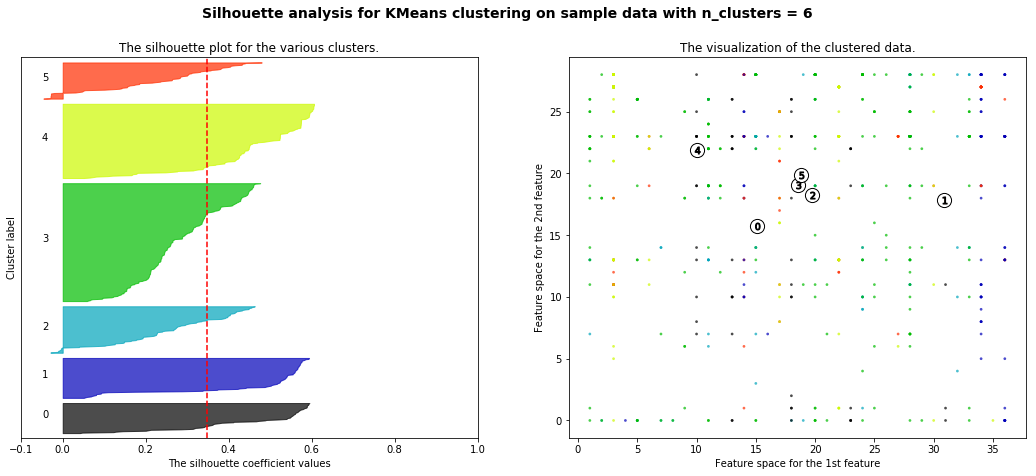

In [61]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]
X = absenteeism.values
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

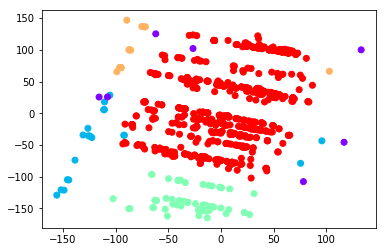

In [93]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
cluster.fit_predict(absenteeism)
plt.scatter(absenteeism_transformed[:,0], absenteeism_transformed[:,1], c=cluster.labels_, cmap='rainbow')

In [77]:
labels_true = np.zeros((740,))
labels_true[absenteeism['Absenteeism time in hours'] <= 2] = 1
labels_true[np.logical_and(absenteeism['Absenteeism time in hours'] > 2,absenteeism['Absenteeism time in hours'] <= 8)] = 2
labels_true[absenteeism['Absenteeism time in hours'] > 8] = 3